In [29]:
import pymc3 as pm
import theano.tensor as tt
import numpy as np
from matplotlib import pyplot as plt

from scipy import stats

In [6]:
np.random.seed(0)

ndims = 5
ndata = 100
X = np.random.randn(ndata, ndims)
w_ = np.random.randn(ndims)  # hidden
noise_ = 0.1 * np.random.randn(ndata)  # hidden

y_obs = X.dot(w_) + noise_

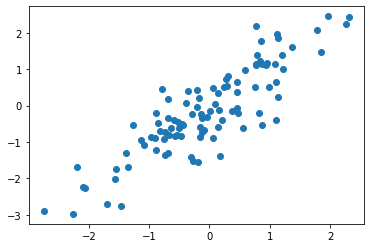

In [50]:
plt.scatter(X[:,2], y_obs)
plt.show()

In [18]:
mymodel = pm.Model()

with mymodel:
    w = pm.Normal('w', 0, 1, shape=ndims)    #this is a prior
    y = pm.Normal('y', tt.dot(X, w), 0.1, observed=y_obs)    #this is a posterior
    trace = pm.sample(1000)

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [w]


/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 14 seconds.


(4000, 5)


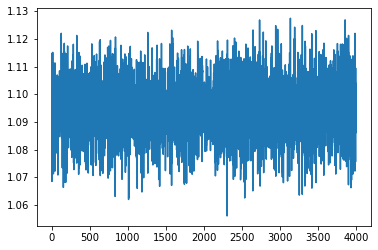

In [27]:
print(trace.get_values('w').shape)
plt.plot(trace.get_values('w')[:, 2])
plt.show()

In [47]:
for i in range(5):
    summary = stats.describe(trace.get_values('w')[:, i])
    print(f"{i}: w[i] = {w_[i]}, mean sample = {summary.mean}")

0: w[i] = 0.38273243001226814, mean sample = 0.37259311324417344
1: w[i] = -0.03424228053195387, mean sample = -0.03531807190808443
2: w[i] = 1.0963468456657985, mean sample = 1.0942661677810002
3: w[i] = -0.23421580134453654, mean sample = -0.23417419126099123
4: w[i] = -0.3474506524985633, mean sample = -0.3388672495980506


In [62]:
flips = np.random.binomial(3, 0.2, size=20)

betabinom = pm.Model()

with betabinom:
    theta = pm.Beta('theta', alpha=1, beta=1, initval=0.5)    #this is a prior
    k = pm.Binomial('k', n=3, p=theta, observed=flips, initval=1)    #this is a posterior
    bb_trace = pm.sample(100)

/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Only 100 samples in chain.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/usr/local/Caskroom/miniconda/base/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 100 draw iterations (4_000 + 400 draws total) took 12 seconds.


(400, 1)


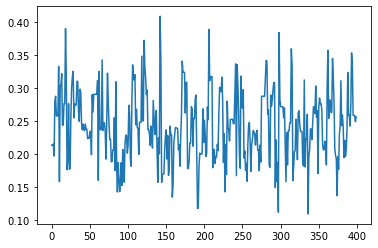

In [65]:
print(bb_trace.get_values('theta').shape)
plt.plot(bb_trace.get_values('theta'))
plt.show()

In [66]:
stats.describe(bb_trace.get_values('theta')).mean

array([0.24370436])

In [68]:
flips.sum()/60

0.23333333333333334